In [17]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [143]:
import numpy as np
from scipy.io import loadmat
from scipy.ndimage import binary_erosion,binary_dilation
import matplotlib.pyplot as plt

import plot_func as pf

# Open Naive .mat File

In [39]:
naive_mat = loadmat('./../RF Data Lempel/RF Naive animals.mat')
exper_mat = loadmat('./../RF Data Lempel/RF Experienced animals.mat')

In [6]:
naive_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'OFF', 'ON', 'RF'])

In [86]:
print(naive_mat['OFF'].shape)
print(exper_mat['OFF'].shape)

Nnaive = naive_mat['OFF'].shape[1]
Nexper = exper_mat['OFF'].shape[1]

(1, 33)
(1, 38)


In [87]:
for i in range(Nnaive):
    print(naive_mat['OFF'][0,i].shape)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


In [287]:
naive_RF_ON = [None]*Nnaive
naive_RF_OF = [None]*Nnaive
naive_ON_Rsp = [None]*Nnaive
naive_OF_Rsp = [None]*Nnaive
exper_RF_ON = [None]*Nexper
exper_RF_OF = [None]*Nexper
exper_ON_Rsp = [None]*Nexper
exper_OF_Rsp = [None]*Nexper

sig_cutoff = 3
# sml_struct = np.ones((1,1))
# big_struct = np.ones((1,1))
sml_struct = np.array(
    [[1,1],
     [1,1]]
)
big_struct = np.array(
    [[1,1,1],
     [1,1,1],
     [1,1,1]]
)

for i in range(Nnaive):
    size = naive_mat['RF'][0,i].shape[0]
    if size == 50:
        struct = sml_struct
    else:
        struct = big_struct
        
    naive_RF_ON[i] = binary_dilation(binary_erosion((naive_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                    struct),struct).astype(int)
    naive_RF_OF[i] = binary_dilation(binary_erosion((naive_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                    struct),struct).astype(int)
    naive_ON_Rsp[i] = binary_dilation(binary_erosion((naive_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                     struct),struct).astype(int)
    naive_OF_Rsp[i] = binary_dilation(binary_erosion((naive_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                     struct),struct).astype(int)
    
for i in range(Nexper):
    size = exper_mat['RF'][0,i].shape[0]
    if size == 50:
        struct = sml_struct
    else:
        struct = big_struct
        
    exper_RF_ON[i] = binary_dilation(binary_erosion((exper_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                    struct),struct).astype(int)
    exper_RF_OF[i] = binary_dilation(binary_erosion((exper_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                    struct),struct).astype(int)
    exper_ON_Rsp[i] = binary_dilation(binary_erosion((exper_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                     struct),struct).astype(int)
    exper_OF_Rsp[i] = binary_dilation(binary_erosion((exper_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                     struct),struct).astype(int)

In [288]:
naive_RF_ON_frac = np.zeros(Nnaive)
naive_RF_OF_frac = np.zeros(Nnaive)
naive_ON_Rsp_frac = np.zeros(Nnaive)
naive_OF_Rsp_frac = np.zeros(Nnaive)
exper_RF_ON_frac = np.zeros(Nexper)
exper_RF_OF_frac = np.zeros(Nexper)
exper_ON_Rsp_frac = np.zeros(Nexper)
exper_OF_Rsp_frac = np.zeros(Nexper)

sig_cutoff = 2

for i in range(Nnaive):
    size = naive_mat['RF'][0,i].shape[0]
    naive_RF_ON_frac[i] = np.sum(naive_RF_ON[i]) / size**2
    naive_RF_OF_frac[i] = np.sum(naive_RF_OF[i]) / size**2
    naive_ON_Rsp_frac[i] = np.sum(naive_ON_Rsp[i]) / size**2
    naive_OF_Rsp_frac[i] = np.sum(naive_OF_Rsp[i]) / size**2
    
for i in range(Nexper):
    size = exper_mat['RF'][0,i].shape[0]
    exper_RF_ON_frac[i] = np.sum(exper_RF_ON[i]) / size**2
    exper_RF_OF_frac[i] = np.sum(exper_RF_OF[i]) / size**2
    exper_ON_Rsp_frac[i] = np.sum(exper_ON_Rsp[i]) / size**2
    exper_OF_Rsp_frac[i] = np.sum(exper_OF_Rsp[i]) / size**2

In [289]:
frac_cutoff = 0.002

naive_RF_ON_subrgn = naive_RF_ON_frac > frac_cutoff
naive_RF_OF_subrgn = naive_RF_OF_frac > frac_cutoff
naive_ON_subrgn = naive_ON_Rsp_frac > frac_cutoff
naive_OF_subrgn = naive_OF_Rsp_frac > frac_cutoff
naive_two_subrgn = np.logical_and(naive_ON_subrgn,naive_OF_subrgn)
naive_oriented = np.logical_and(np.logical_and(naive_RF_ON_subrgn,naive_RF_OF_subrgn),naive_two_subrgn)
naive_overlap = np.logical_and(np.logical_and(naive_ON_subrgn,naive_OF_subrgn),np.logical_not(naive_oriented))

naive_oriented_idxs = np.argwhere(naive_oriented)[:,0]
naive_overlap_idxs = np.argwhere(naive_overlap)[:,0]

print(naive_oriented_idxs)
print(naive_overlap_idxs)

[ 6 17]
[ 0  7 13 27 28]


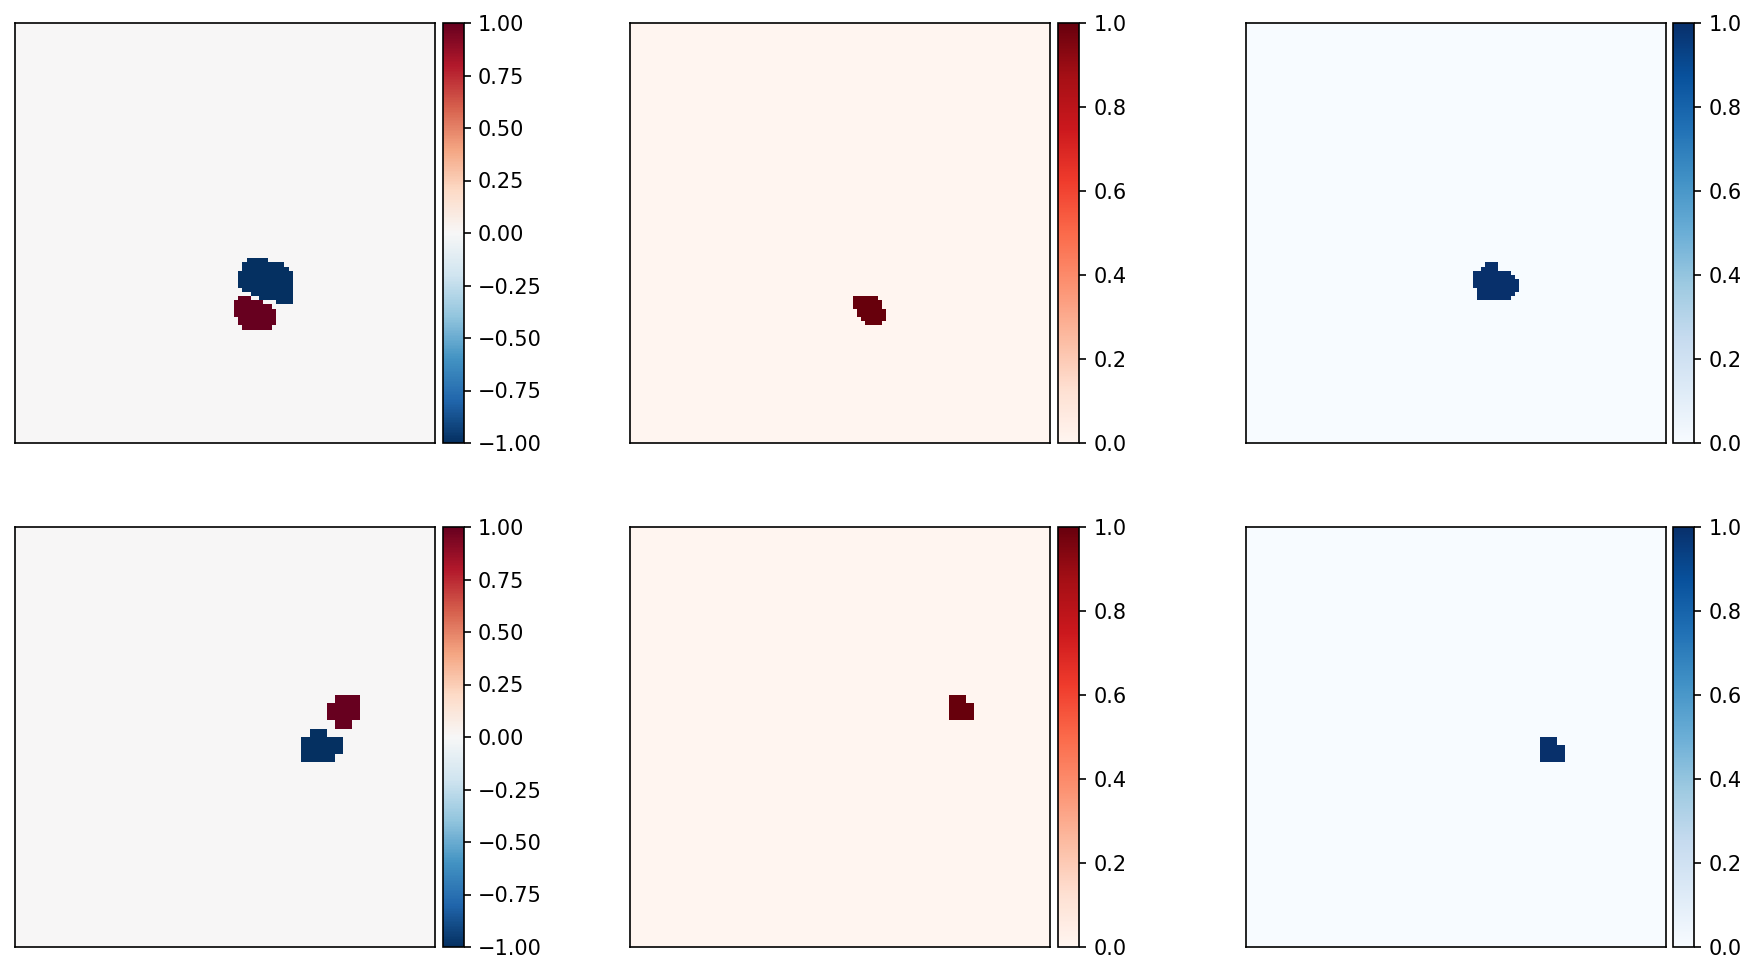

In [290]:
cell_idxs = naive_oriented_idxs

fig,axs = plt.subplots(len(cell_idxs),3,figsize=(15,4*len(cell_idxs)),dpi=150)

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[idx,0],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.imshowbar(fig,axs[idx,1],naive_ON_Rsp[cell_idx],cmap='Reds',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[idx,2],naive_OF_Rsp[cell_idx],cmap='Blues',vmin=0,vmax=1)

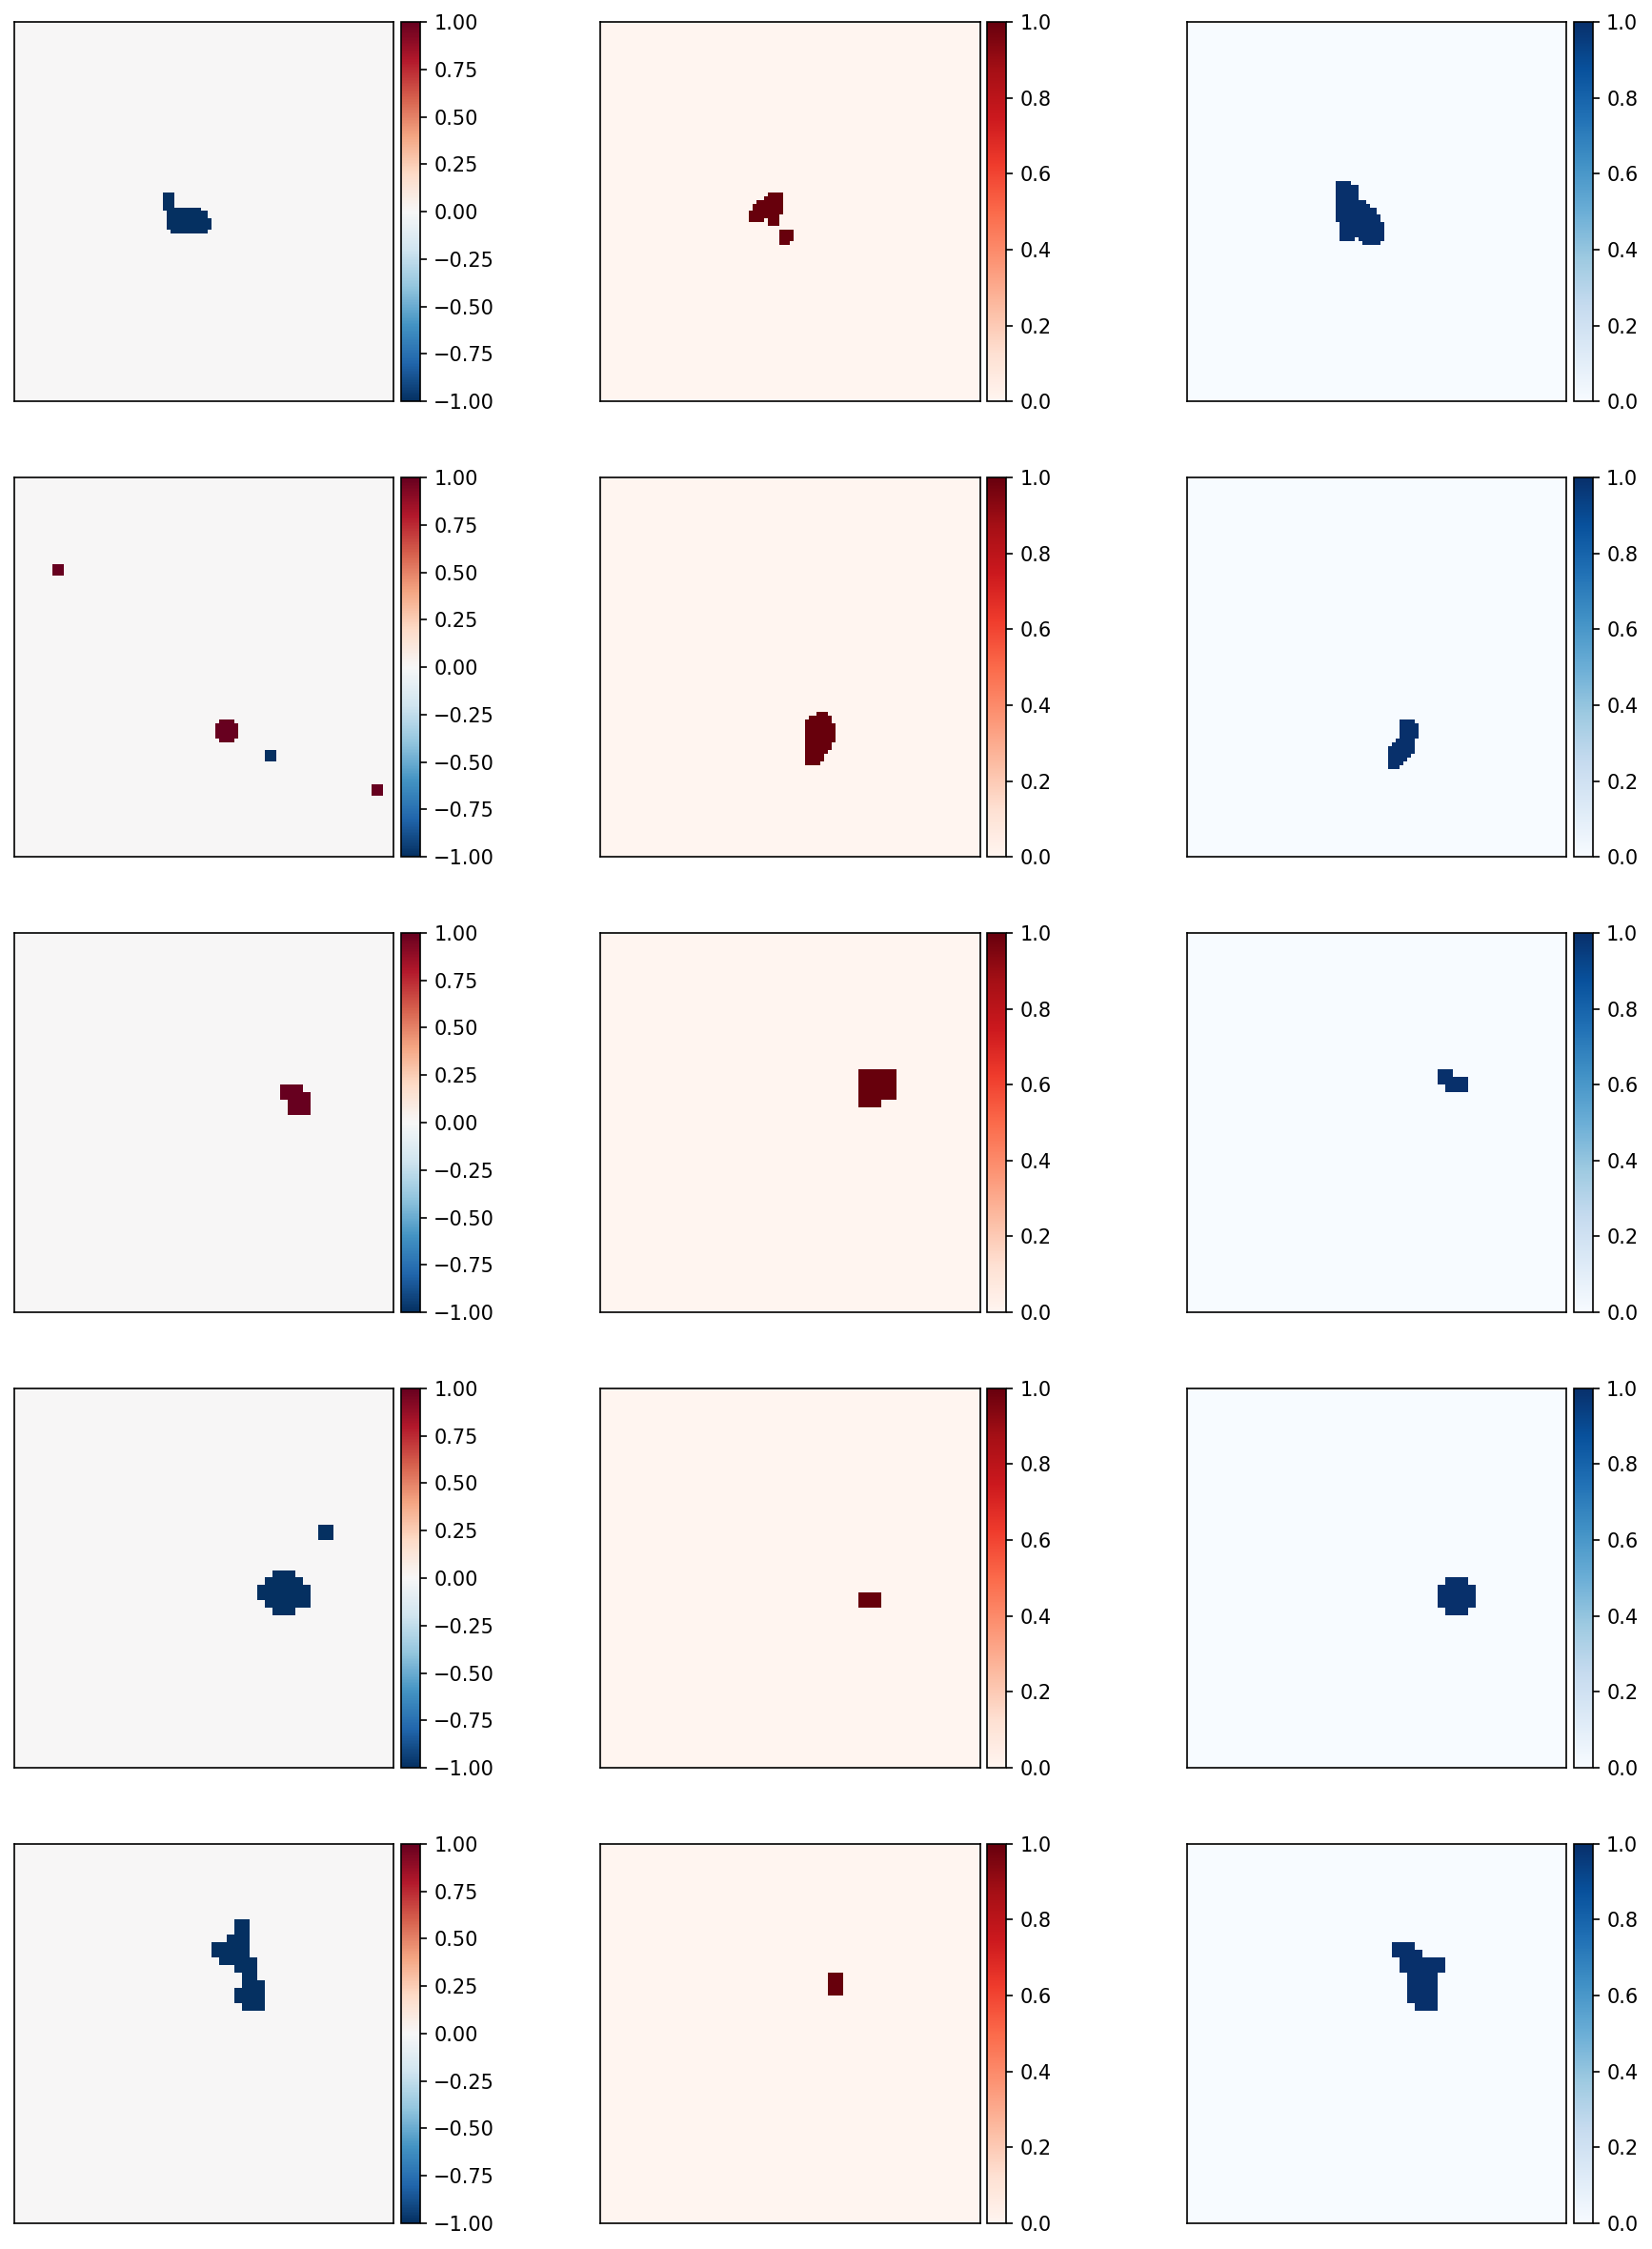

In [291]:
cell_idxs = naive_overlap_idxs

fig,axs = plt.subplots(len(cell_idxs),3,figsize=(15,4*len(cell_idxs)),dpi=150)

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[idx,0],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.imshowbar(fig,axs[idx,1],naive_ON_Rsp[cell_idx],cmap='Reds',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[idx,2],naive_OF_Rsp[cell_idx],cmap='Blues',vmin=0,vmax=1)

Text(0.5, 1.0, 'Off Subregion')

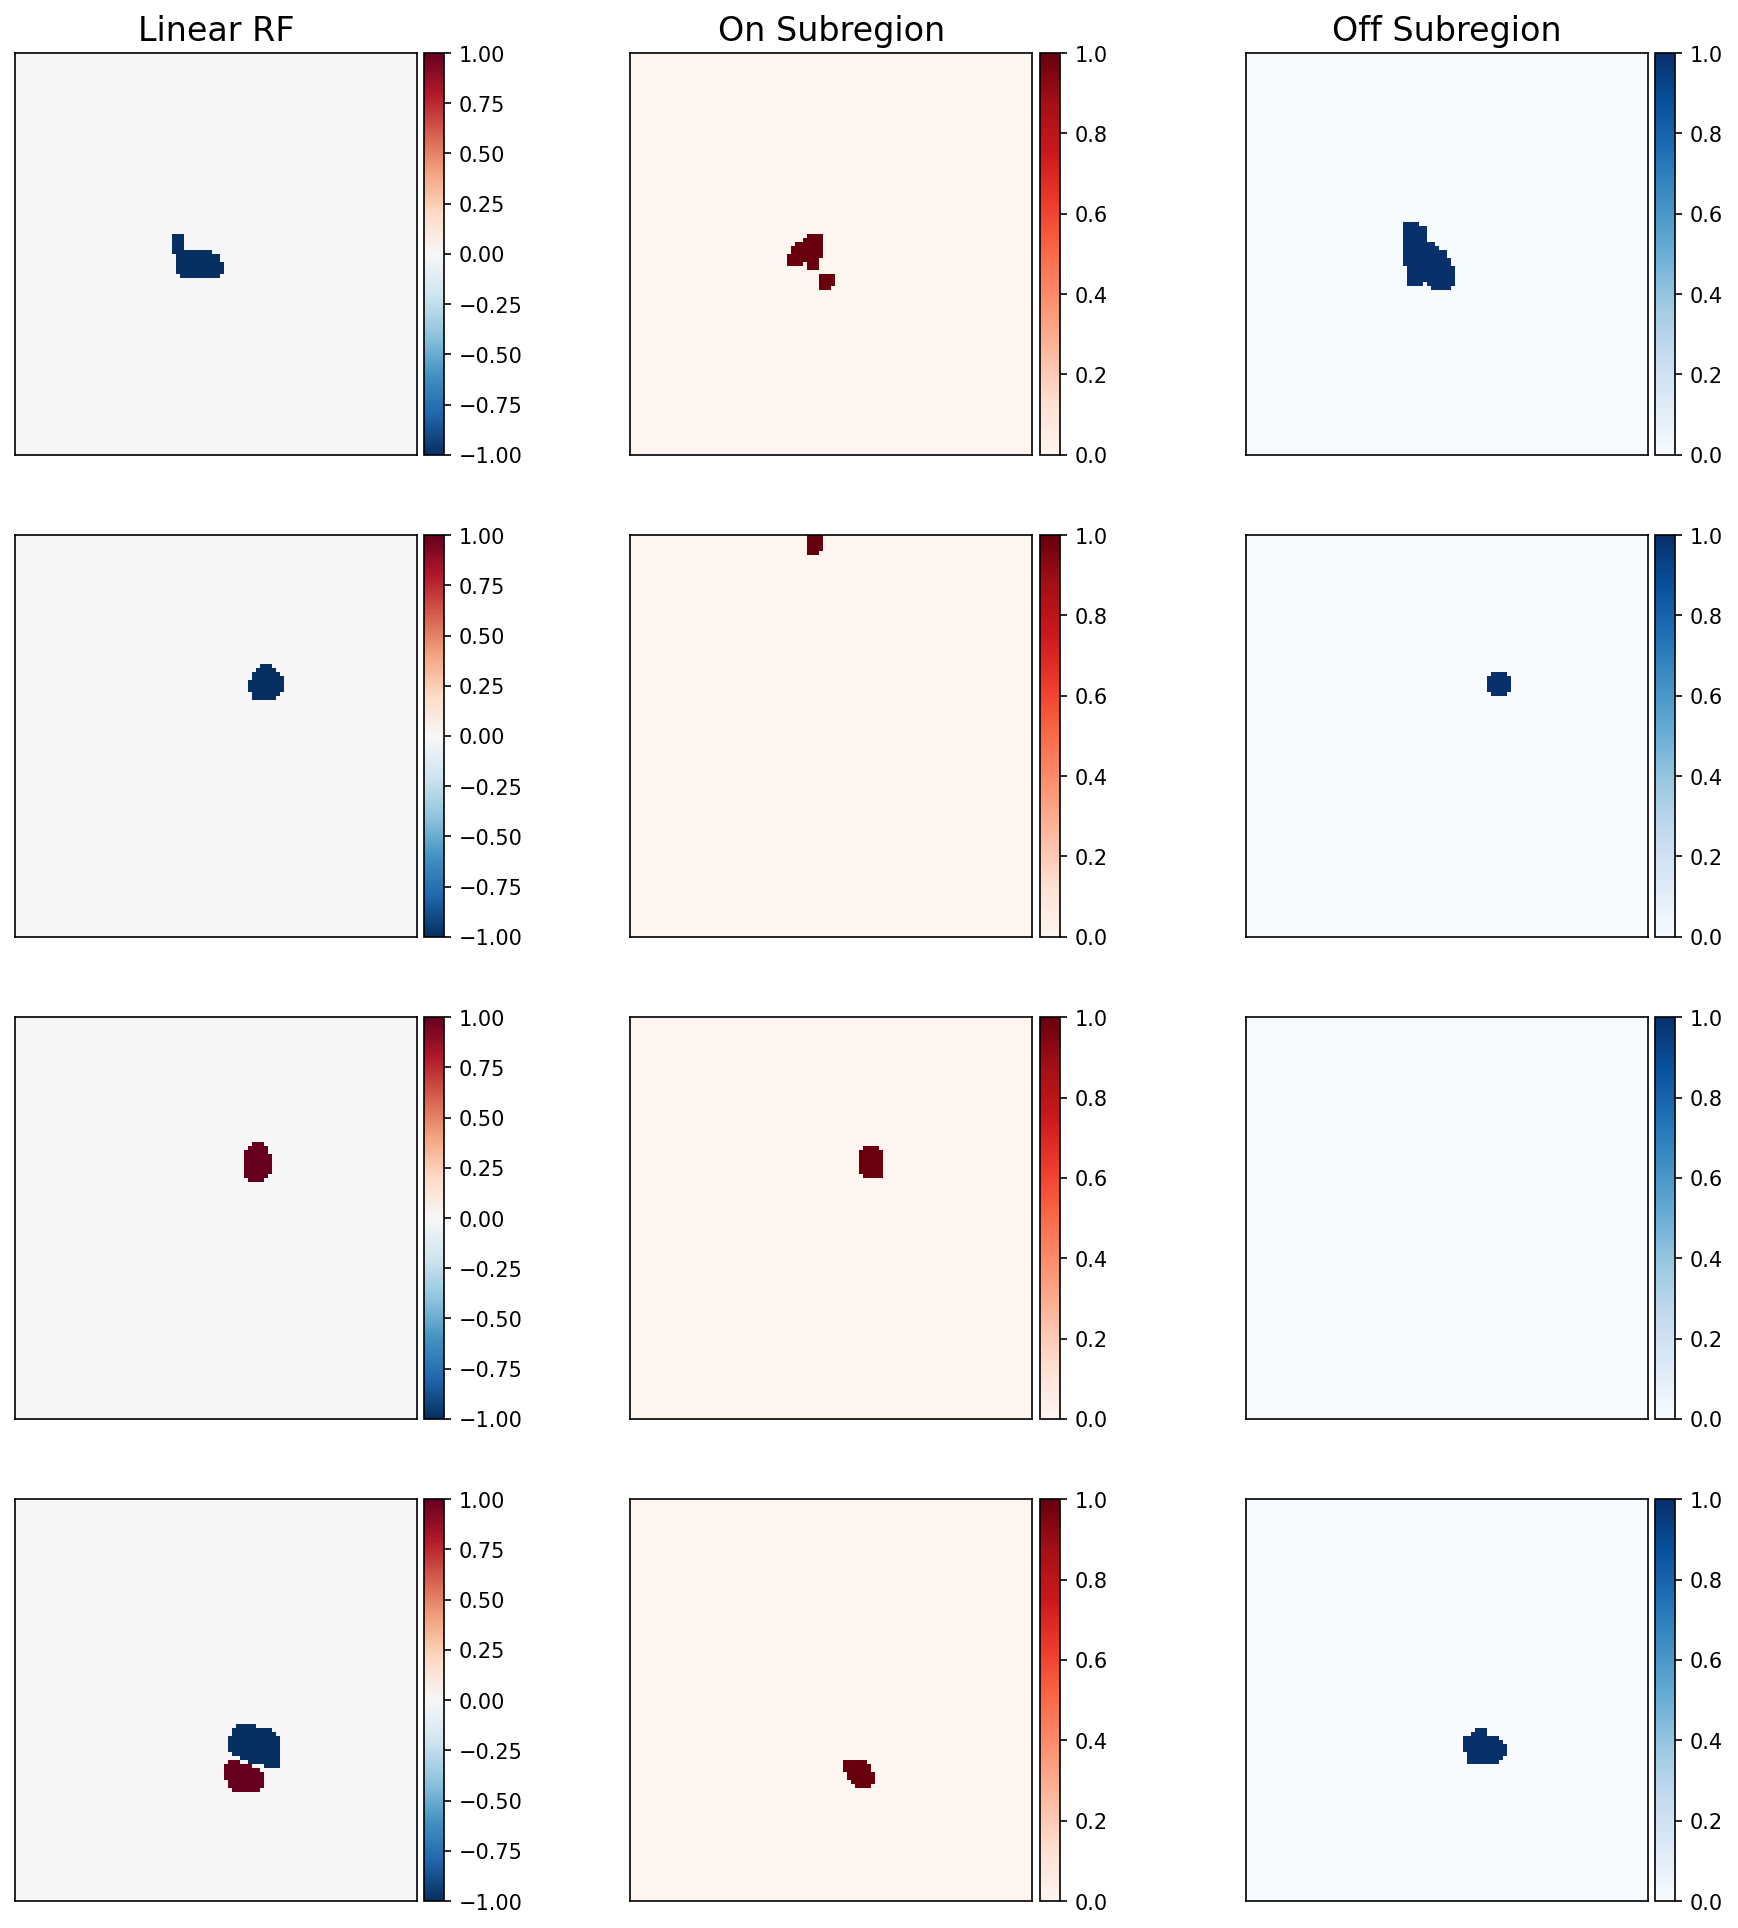

In [298]:
cell_idxs = np.arange(0,6+1,2)

fig,axs = plt.subplots(len(cell_idxs),3,figsize=(15,4*len(cell_idxs)),dpi=150)

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[idx,0],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.imshowbar(fig,axs[idx,1],naive_ON_Rsp[cell_idx],cmap='Reds',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[idx,2],naive_OF_Rsp[cell_idx],cmap='Blues',vmin=0,vmax=1)
    
axs[0,0].set_title('Linear RF',fontsize=16)
axs[0,1].set_title('On Subregion',fontsize=16)
axs[0,2].set_title('Off Subregion',fontsize=16)

In [292]:
frac_cutoff = 0.001

exper_RF_ON_subrgn = exper_RF_ON_frac > frac_cutoff
exper_RF_OF_subrgn = exper_RF_OF_frac > frac_cutoff
exper_ON_subrgn = exper_ON_Rsp_frac > frac_cutoff
exper_OF_subrgn = exper_OF_Rsp_frac > frac_cutoff
exper_two_subrgn = np.logical_and(exper_ON_subrgn,exper_OF_subrgn)
exper_oriented = np.logical_and(np.logical_and(exper_RF_ON_subrgn,exper_RF_OF_subrgn),exper_two_subrgn)
exper_overlap = np.logical_and(np.logical_and(exper_ON_subrgn,exper_OF_subrgn),np.logical_not(exper_oriented))

exper_oriented_idxs = np.argwhere(exper_oriented)[:,0]
exper_overlap_idxs = np.argwhere(exper_overlap)[:,0]

print(exper_oriented_idxs)
print(exper_overlap_idxs)

[ 6 17 21 25 27]
[ 3 14 18]


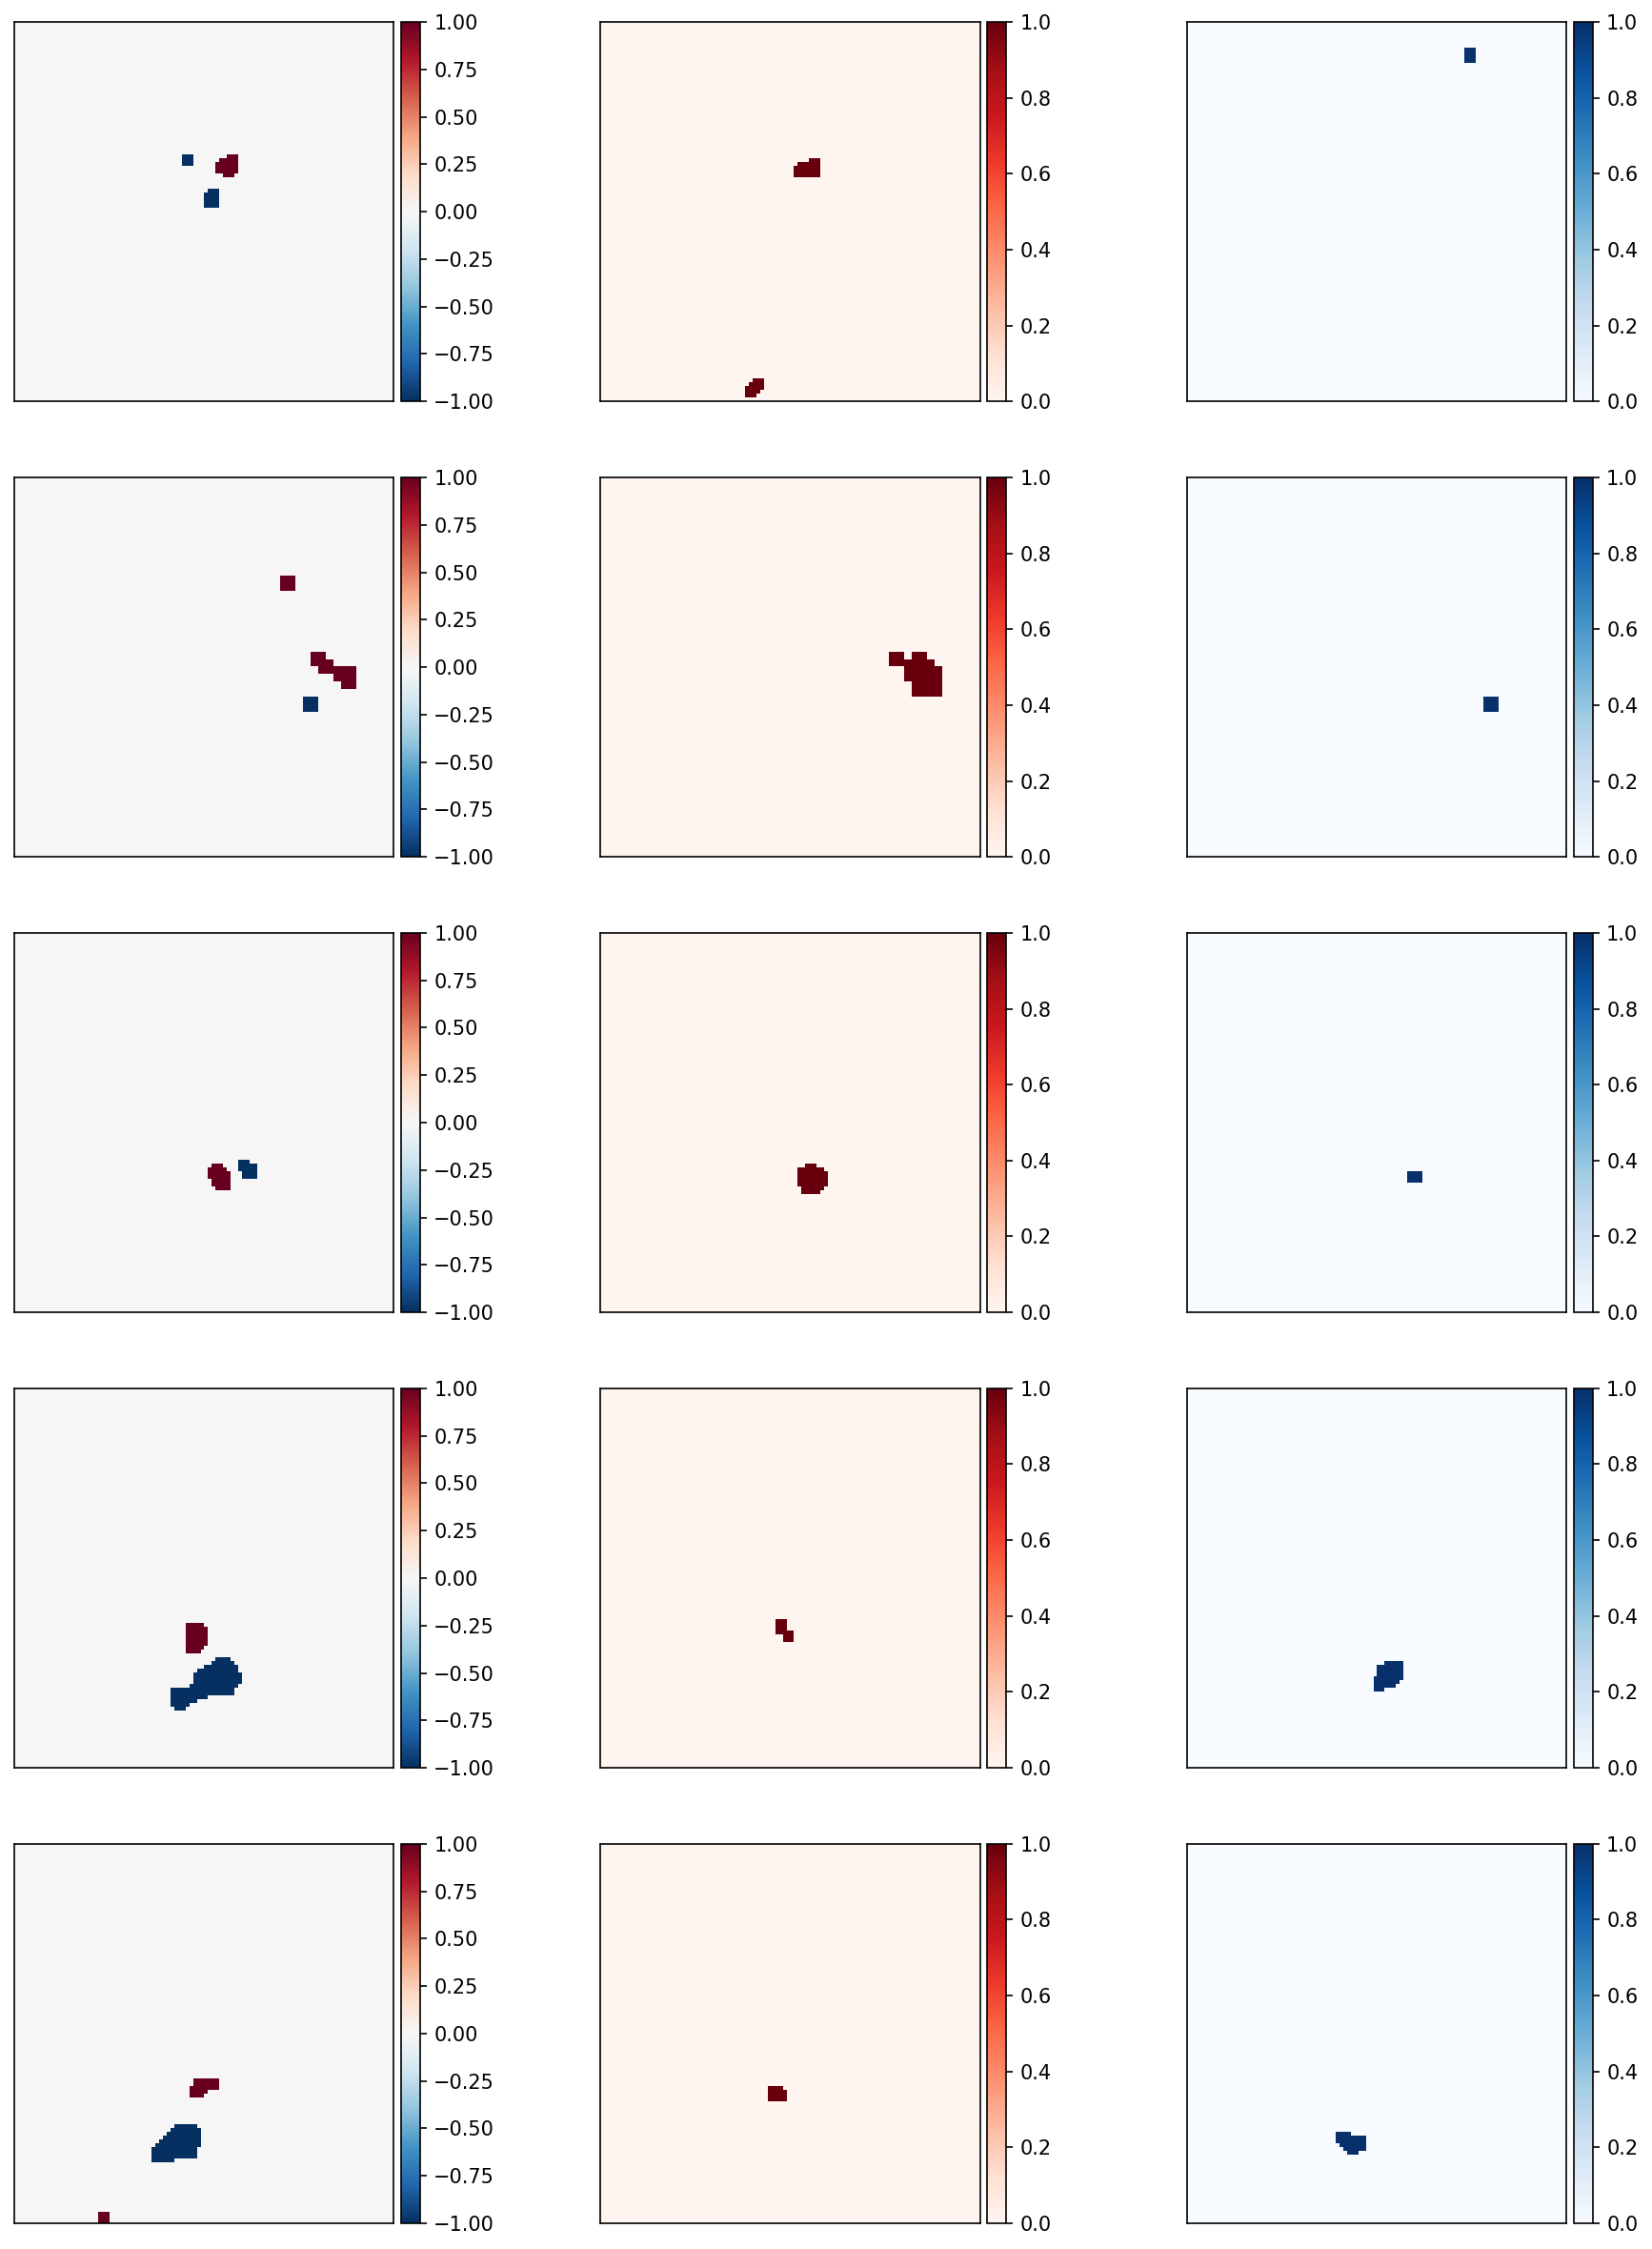

In [293]:
fig,axs = plt.subplots(len(exper_oriented_idxs),3,figsize=(15,4*len(exper_oriented_idxs)),dpi=150)

cell_idxs = exper_oriented_idxs
cutoff = 3

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[idx,0],exper_RF_ON[cell_idx] - exper_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.imshowbar(fig,axs[idx,1],exper_ON_Rsp[cell_idx],cmap='Reds',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[idx,2],exper_OF_Rsp[cell_idx],cmap='Blues',vmin=0,vmax=1)